# Example 1

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, CurrentSource, RealCurrentSource
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, SchematicDiagramSolution, network_parser
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver

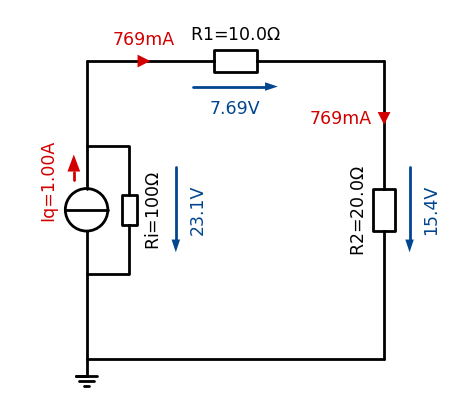

In [2]:
with Schematic() as schematic:
    schematic += (I:=RealCurrentSource(
        current_source=CurrentSource(I=1, R=100, name='Iq'),
        resistor=Resistor(R=100, name='Ri'),
        zoom_resistor=0.7).up())
    schematic += (R1:=Resistor(R=10, name='R1')).right()
    schematic += Resistor(R=20, name='R2').down()
    schematic += Line().left()
    schematic += Ground()
    solution = nodal_analysis_solver(network_parser(schematic))
    schemdraw_solution = SchematicDiagramSolution(SchematicDiagramAnalyzer(schematic), solution)
    schematic += schemdraw_solution.draw_voltage('R1')
    schematic += schemdraw_solution.draw_current('R1')
    schematic += schemdraw_solution.draw_voltage('R2')
    schematic += schemdraw_solution.draw_current('R2')
    schematic += schemdraw_solution.draw_voltage('Iq', reverse=True)